In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ilab/dataset/parkinsons.data")

In [4]:
y = df['status']

In [5]:
X = df[['spread1', 'PPE', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'D2']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.80132308,  0.86888575, -0.19322537, -0.82929965, -0.95203729,
        -0.21053082],
       [ 1.47985265,  1.80360503, -0.63450828, -0.77097169, -0.05772056,
         0.27507712],
       [ 1.14144541,  1.40266141, -0.27976031, -0.90947638, -0.10987483,
        -0.10362861],
       ...,
       [-1.01415428, -0.83241014, -0.90679887,  0.49557839, -0.96839309,
         0.78033848],
       [-0.97496019, -0.92610456, -0.64923282,  1.07876114, -0.95417967,
        -0.63700298],
       [-0.03647134, -0.64505466, -0.15335586,  1.45481664, -0.88348115,
         0.45480231]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [9]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
train_pred = knc.predict(X_train)

In [11]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, train_pred)

In [12]:
print(f"The training data accuracy is : {train_acc}")

The training data accuracy is : 0.9230769230769231


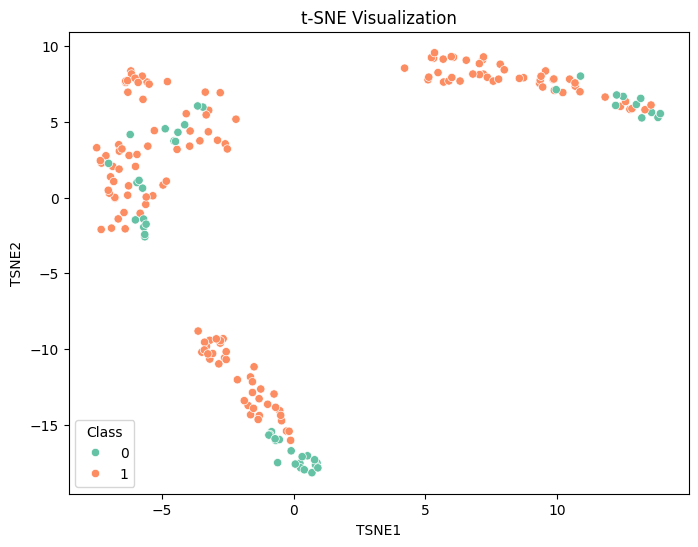

In [13]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()